In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [75]:
# Data Cleaning

In [76]:
UberData=pd.read_csv('Uber Request Data.csv')
UberData.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [77]:
#Correcting and verifying the data types

UberData['Request timestamp'] = pd.to_datetime(UberData['Request timestamp'])
UberData['Drop timestamp'] = pd.to_datetime(UberData['Drop timestamp'])
UberData.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [78]:
# Removing unnecessary columns

UberData = UberData.drop(['Driver id'], axis = 1)

In [79]:
#How many unique pickup points are present?
print(UberData['Pickup point'].unique())

['Airport' 'City']


In [80]:
#How many observations are present ?
UberData.shape

(6745, 5)

In [81]:
UberData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [82]:
#Inspecting the Null values , column-wise
UberData.isnull().sum(axis=0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [83]:
UberData[(UberData['Drop timestamp'].isnull())].groupby('Status').size()


Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [84]:
#Checking if there are any duplicate values
len(UberData[UberData.duplicated()].index)

0

In [85]:
# Univariate analysis

# Q:1 Create plots to visualize the frequency of requests that get canceled or show 'no cars available'; identify the most problematic types of requests (city to airport/airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

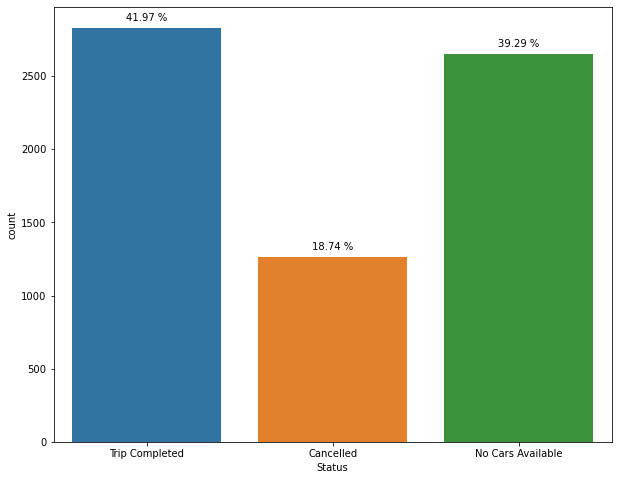

In [86]:
# Plot over status


plt.figure(figsize=(10, 8))
status_df =sns.countplot(x="Status", data=UberData)
total = len(UberData)
for p in status_df.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    status_df.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()

#Only 41.97% requests from city and airport request gets completed 


<AxesSubplot:xlabel='Pickup point'>

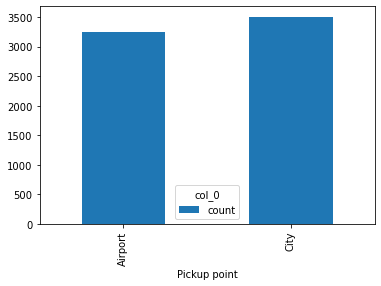

In [87]:
#Univariate analysis on Pickup Point column 
pick_point = pd.crosstab(index = UberData["Pickup point"], columns="count")     
pick_point.plot.bar()

In [88]:
# Bivariate Analysis 

#grouping by Status and Pickup point.
UberData.groupby(['Status', 'Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

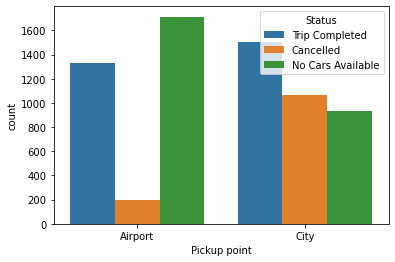

In [89]:
sns.countplot(x=UberData['Pickup point'],hue =UberData['Status'] ,data = UberData)


# conclusion: 
#There are more 'No cars available' from Airport to City.
# There are more cars 'Cancelled' from City to Airport.

In [90]:
# Q:2 Find gap bw supply and Gap

In [91]:
#Request and Drop hours
UberData['Request Hour'] = UberData['Request timestamp'].dt.hour

#Time Slots
UberData['Request Time Slot'] = 'Early Morning'
UberData.loc[UberData['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
UberData.loc[UberData['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
UberData.loc[UberData['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
UberData.loc[UberData['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
UberData.loc[UberData['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'

In [92]:
UberData['Demand'] = 1


In [93]:
UberData['Supply'] = 0
UberData.loc[(UberData['Status'] == 'Trip Completed'),'Supply'] = 1

In [95]:
#Demand Supply Gap can be defined as a difference between Demand and Supply

UberData['Gap'] = UberData['Demand'] - UberData['Supply']
UberData.loc[UberData['Gap']==0,'Gap'] = 'Trip Completed'
UberData.loc[UberData['Gap']==1,'Gap'] = 'Trip Not Completed'

In [96]:
#Removing unnecessary columns
UberData = UberData.drop(['Request Hour', 'Demand', 'Supply'], axis=1)


UberData.head()




,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed


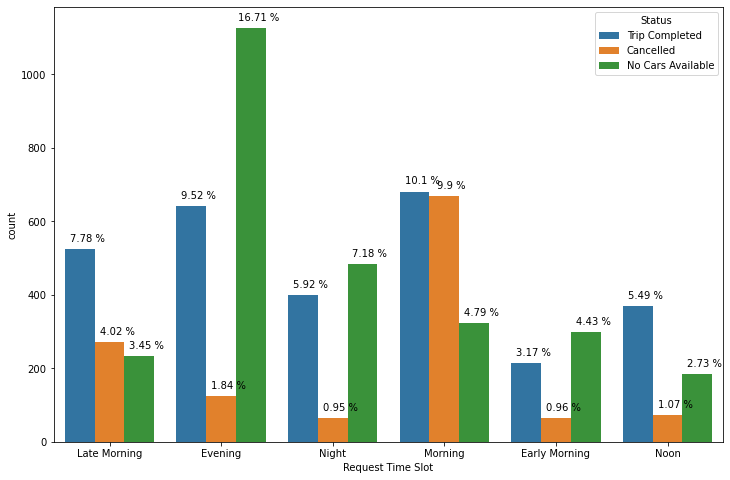

In [41]:
# Plot to find the count of the requests as per the defined time slots
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

req_df=sns.countplot(x=UberData['Request Time Slot'],hue =UberData['Status'] ,data = UberData)


total = len(UberData)
for p in req_df.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    req_df.text(X, Y, '{:} %'.format(value), ha="center")
    
    
# The above plot shows that for most of the  Airport pickup requests there are no cars available 
#and most requests that get cancelled are from city pickup requests

<AxesSubplot:xlabel='Pickup point,Request Time Slot'>

<Figure size 864x576 with 0 Axes>

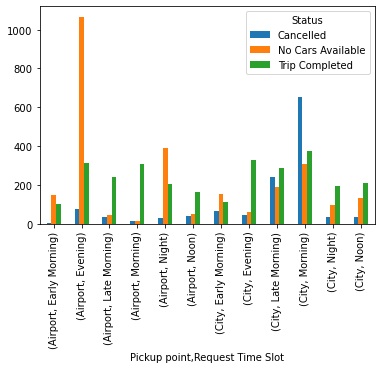

In [42]:
# Plot to find the count of the status, according to both pickup point and the time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')



pickup_Data = pd.DataFrame(UberData.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_Data.plot.bar()

# depicts that there is high request rates from 5-9am and 5-10pm.

<AxesSubplot:xlabel='Gap', ylabel='count'>

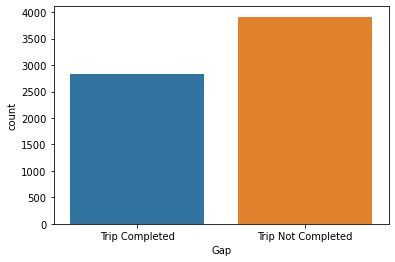

In [98]:
#Plot to count the number of requests completed and not completed
sns.countplot(x=UberData['Gap'], data = UberData)




# Gap = Demand -Supply
#Around 58.02% of 'gap' exist.

<AxesSubplot:xlabel='Request Time Slot'>

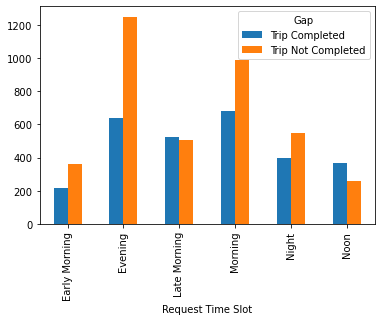

In [28]:
# Plot to count the number of requests that was completed and not completed against the time slot
gap_timeslot_df = pd.DataFrame(UberData.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

<AxesSubplot:xlabel='Pickup point'>

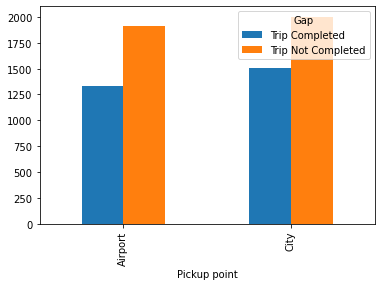

In [29]:
#Plot to count the number of requests that was completed and not completed against pickup point
gap_pickup_df = pd.DataFrame(UberData.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()



<AxesSubplot:xlabel='Request Time Slot,Pickup point'>

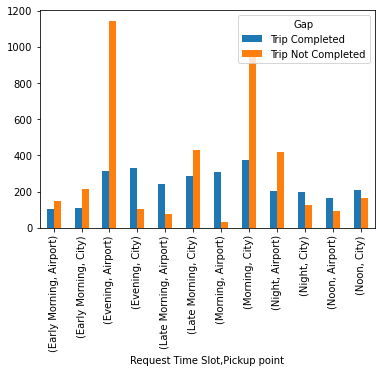

In [30]:
#Plot to count the number of requests that was completed and which was not, for the final analysis on Pickup point and Time slots
gap_main_df = pd.DataFrame(UberData.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed


<Figure size 936x360 with 0 Axes>

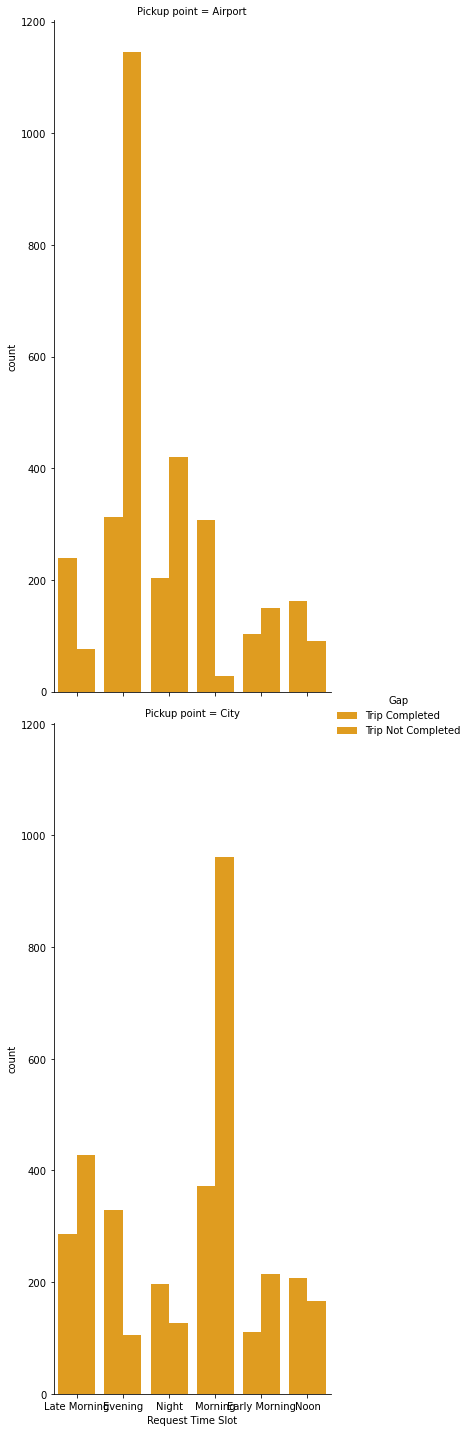

In [110]:
#segmenting the gap across the request hour and pickup point
plt.figure(num=None, figsize=(13, 5), facecolor='w', edgecolor='k')
sns.catplot(x='Request Time Slot',col="Pickup point", hue = 'Gap',data=UberData ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()

# the graph below shows that:
# 1. Airport has hightest gap at 5-9 Pm hours which is evening hours
# 2. City has hightest gap at 5-9am hours which is morning hours
